In [1]:
import logging

FORMAT = '%(levelname)s %(asctime)-15s: %(message)s'
logging.basicConfig(format=FORMAT)
logging.getLogger().setLevel(logging.INFO)

In [2]:
import alibaba_graph_rust

In [3]:
result = alibaba_graph_rust.run_op("average_degree")

INFO 2023-12-19 03:18:38,833: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_135_4050_4080
INFO 2023-12-19 03:18:38,833: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_270_8100_8130
INFO 2023-12-19 03:18:38,834: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_22_660_690
INFO 2023-12-19 03:18:38,834: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_540_16200_16230
INFO 2023-12-19 03:18:38,834: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_315_9450_9480
INFO 2023-12-19 03:18:38,834: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_0_0_30
INFO 2023-12-19 03:18:38,834: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_720_21600_21630
INFO 2023-12-19 03:18:38,834: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_33_990_1020
INFO 2023-12-19 03:18:38,834: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_90_27

In [5]:
avg_degree, window_idx, global_window_num, start_window, end_window = zip(*result)

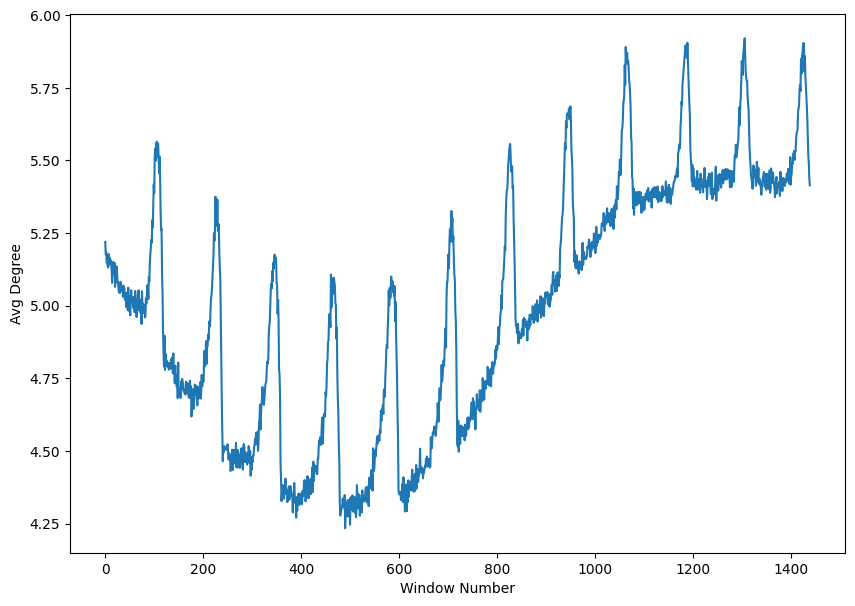

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(window_idx, avg_degree)
plt.xlabel('Window Number')
plt.ylabel('Avg Degree')
plt.show()

In [3]:
number_of_vertices_result = alibaba_graph_rust.run_op("number_of_vertices")

INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_900_27000_27030
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_360_10800_10830
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_810_24300_24330
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_180_5400_5430
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_765_22950_22980
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_540_16200_16230
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_1170_35100_35130
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-event-windows/window_990_29700_29730
INFO 2023-12-19 15:41:08,538: Started loading /Users/ashfaq/Documents/alibaba-eve

In [7]:
import numpy as np

number_of_vertices, window_idx, _, _, _ = zip(*number_of_vertices_result)
number_of_vertices = np.round(number_of_vertices).astype(int)

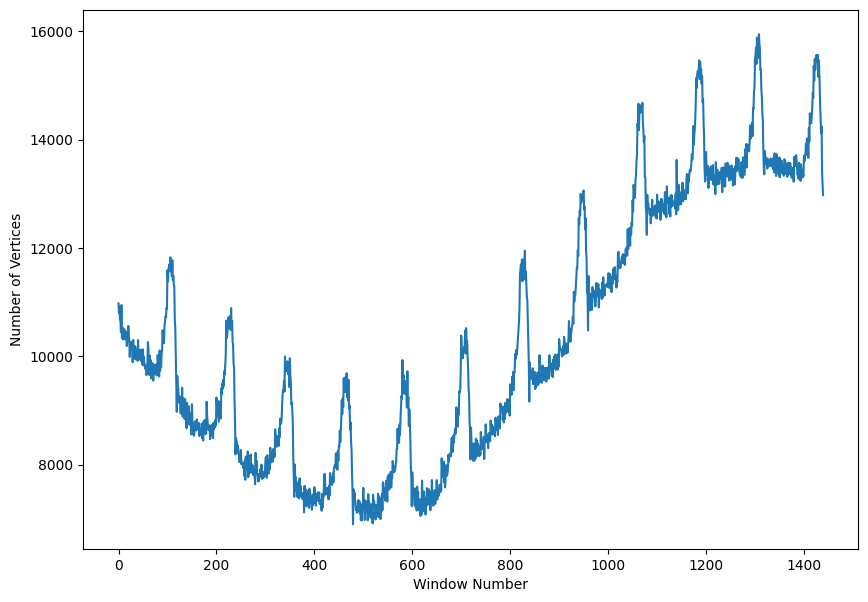

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(window_idx, number_of_vertices)
plt.xlabel('Window Number')
plt.ylabel('Number of Vertices')
plt.show()